# 2D post processing

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib, shlex, subprocess
import xbout
import scipy
import xhermes
from xhermes import *


sys.path.append(r"/users/jpm590/2dspace/post-processing/sdtools/")


from hermes3.utils import *


from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.selectors import *

%load_ext autoreload
%autoreload 2
print("Done")
import hermes3



Done


## Read Hermes-3

name = whatever you want to name the case

id = the folder name of the case

In [3]:
db = CaseDB(
    case_dir = r"/users/jpm590/scratch/",
        # case_dir = r"/users/jpm590/2dspace/run",

    grid_dir = r"/users/jpm590/2dspace/hermes-3/build-mc-master"
)

toload = [
    dict(name="MAST-U", id="251007-2D-MASTU", unnormalise_geom = True, use_xhermes = True, squash = True)
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    cs[case["name"]].extract_2d_tokamak_geometry()
    

- Reading case 251007-2D-MASTU
-----------------------
- Looking for squash file
- Squash file found. squash date 10/17/2025, 15:41:40, dmp file date 10/16/2025, 00:59:55

Unnormalising with xHermes


In [4]:
# print(f'Species in model: \n {m["species"]}')
# print(f'\nCharged species: \n {m["charged_species"]}')
ds = cs["MAST-U"].ds.isel(t=-1)

m = cs["MAST-U"].ds.metadata
ds

<xarray.Dataset> Size: 5MB
Dimensions:                  (x: 40, theta: 108)
Coordinates: (12/24)
    dx                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dy                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dz                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    zShift                   (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    t                        float64 8B 0.1054
    psi_poloidal             (x, theta) float64 35kB -0.001427 ... 0.00634
    ...                       ...
    Zxy_upper_left_corners   (x, theta) float64 35kB -1.287 -1.279 ... -1.725
    Zxy_upper_right_corners  (x, theta) float64 35kB -1.286 -1.277 ... -1.698
  * x                        (x) int64 320B 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * theta                    (theta) float64 864B 0.07854 0.2356 ... 16.73 16.89
    zeta                     float64 8B 3.142
    theta_idx                (theta) int64 864B 0 1 2 3 4 ... 104 105 106 107
Data variables: (12/157)
    Bxy                      (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Dnnd                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_VgradP               (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_iz                   (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_rec                  (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+e_coll                (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    ...                       ...
    dv                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dr                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    hthe                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dl                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dtor                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dpol                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
Attributes:
    squashoutput_version:  0.2.1
    metadata:              {'BOUT_VERSION': 5.12, 'Bnorm': 1.0, 'Cs0': 97871....
    options:               nout = 20000000            # number of writes\ntim...
    regions:               {'lower_inner_PFR': <xbout.region.Region>\n\tname\...
    geometry:              toroidal
    components:            {'d+': {'type': 'evolve_density, evolve_momentum, ...

In [5]:
ds_all = cs["MAST-U"].ds

t_vals = ds_all.t.values
total_time = len(t_vals)

print(total_time)

5685


To access the functions under `hermesm`, see [accessors.py](https://github.com/mikekryjak/sdtools/blob/4242b6f0a55edf66d0b6e6f706bb7dc8515eb143/hermes3/accessors.py#L9)

`select_custom_sol_ring`: to create custom SOL ring beyond the separatrix.

 - `sepadd`: the number of cells beyond the first cell center outside of separatrix

In [6]:
ds = cs["MAST-U"].ds.isel(t=-1)

# total_time = len(t_vals)plot_selection(ds, ds.hermesm.select_region("core"))


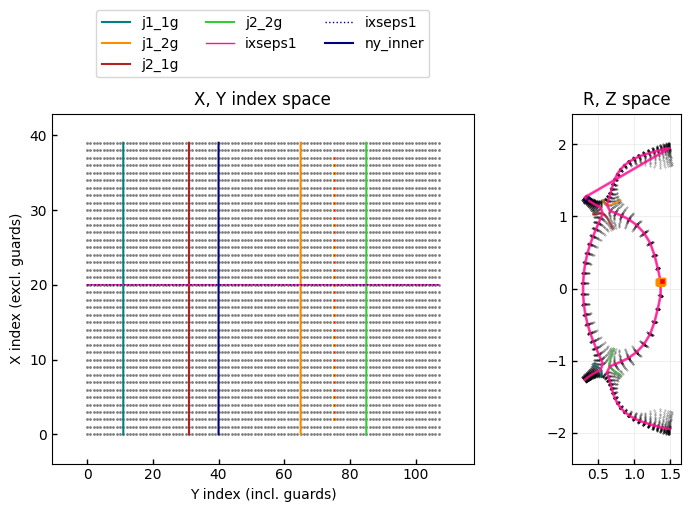

In [7]:
plot_selection(ds, ds.hermesm.select_region("outer_midplane_a"))


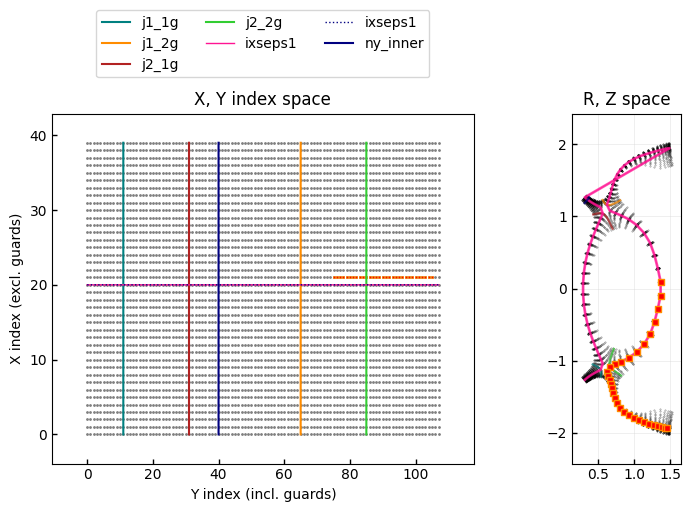

In [9]:
plot_selection(ds, ds.hermesm.select_custom_sol_ring(sepadd = 1, region="outer_lower"))


### Using selection to plot quantities of interest
#### Plot of separatrix density time evolution

Text(0.5, 1.0, 'Separatrix density evolution')

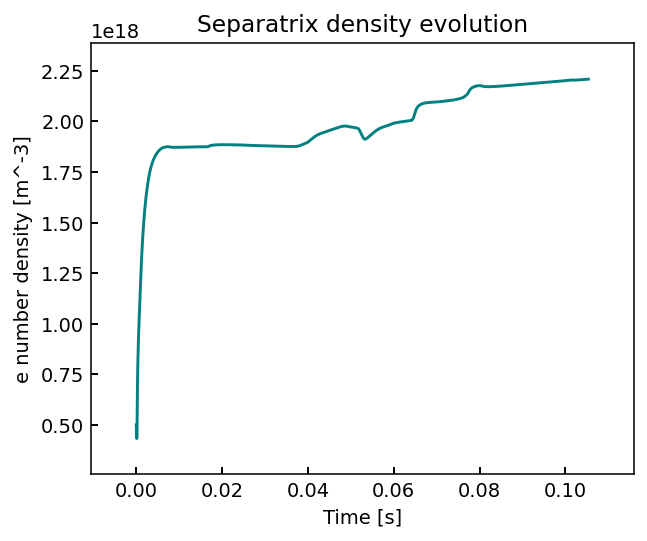

In [ ]:
ds = cs["MAST-U"].ds
ds.hermesm.select_region("outer_midplane_a_sep")["Ne"].plot()
plt.title("Separatrix density evolution")


### Plot target temperature history

- guard cells are included by default

Text(0.5, 1.0, 'Target temperature history')

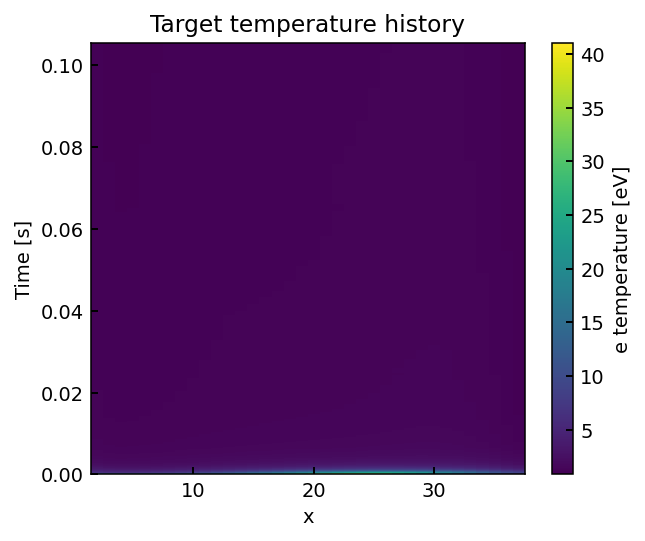

In [ ]:
ds = cs["MAST-U"].ds
ds.hermesm.select_region("outer_lower_target")["Te"].plot()
plt.title("Target temperature history")

### Plotting radial and poloidal information
#### get 1d poloidal data


R         Z      dpol       Bxy      Bpxy        Te       Td+  \
26  1.275135 -1.680262  0.077293  0.371020  0.018840  1.932889  1.670417   
27  1.359630 -1.666703  0.081238  0.347776  0.013513  1.417202  1.465737   
28  1.423559 -1.681759  0.053467  0.332298  0.016092  1.152827  1.408581   
29  1.466046 -1.694263  0.036847  0.322755  0.017341  0.992746  1.314244   
30  1.495209 -1.702641  0.024396  0.316512  0.017949  0.845318  1.125156   

          Td      dpar      Spol       Spar  
26  1.901985  1.522119  2.255631  13.074304  
27  1.723508  2.090819  2.336869  15.165123  
28  1.620763  1.104052  2.390335  16.269175  
29  1.478126  0.685806  2.427183  16.954981  
30  1.192155  0.430198  2.451578  17.385179

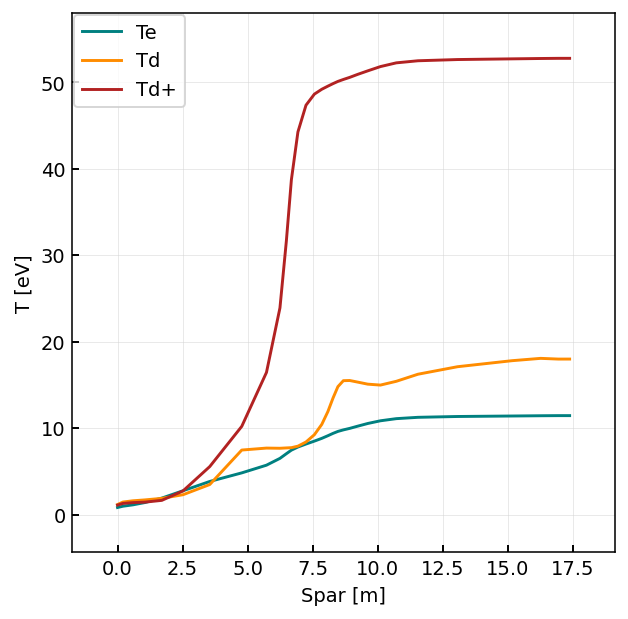

In [ ]:
ds = cs["MAST-U"].ds.isel(t=-1)
df_fieldline = get_1d_poloidal_data(ds, params = ["Te", "Td+", "Td"], region = "outer_lower", sepadd=19)
display(df_fieldline.tail(5))

fig, ax = plt.subplots(figsize = (5,5))
ax.plot(df_fieldline["Spar"].values[::-1], df_fieldline["Te"], label = "Te")
ax.plot(df_fieldline["Spar"].values[::-1], df_fieldline["Td"], label = "Td")
ax.plot(df_fieldline["Spar"].values[::-1], df_fieldline["Td+"], label = "Td+")
ax.set_xlabel("Spar [m]")
ax.set_ylabel("T [eV]")
ax.legend()
ax.grid(True, alpha=0.5)

R         Z      dpol       Bxy      Bpxy        Sd+_iz  \
26  1.288741 -1.777602  0.064839  0.367306  0.022288  4.714324e+21   
27  1.350686 -1.781279  0.058007  0.350335  0.019080  1.079242e+21   
28  1.403256 -1.787911  0.047520  0.337187  0.017925  3.344765e+20   
29  1.444624 -1.794509  0.036270  0.327540  0.017575  1.238651e+20   
30  1.474918 -1.799478  0.025163  0.320826  0.017467  3.127132e+19   

         Sd+_rec    Fdd+_cx      dpar      Spol       Spar  
26 -1.031175e+19   2.075115  1.068562  2.310931  14.042461  
27 -1.378463e+19   0.787831  1.065100  2.368938  15.107561  
28 -1.670678e+19  -0.813365  0.893899  2.416458  16.001460  
29 -1.895614e+19 -11.877119  0.675947  2.452728  16.677407  
30 -2.148721e+19  58.334279  0.462195  2.477891  17.139602

Text(0, 0.5, 'momentum trasnfer rate [kg m-2 s-2]')

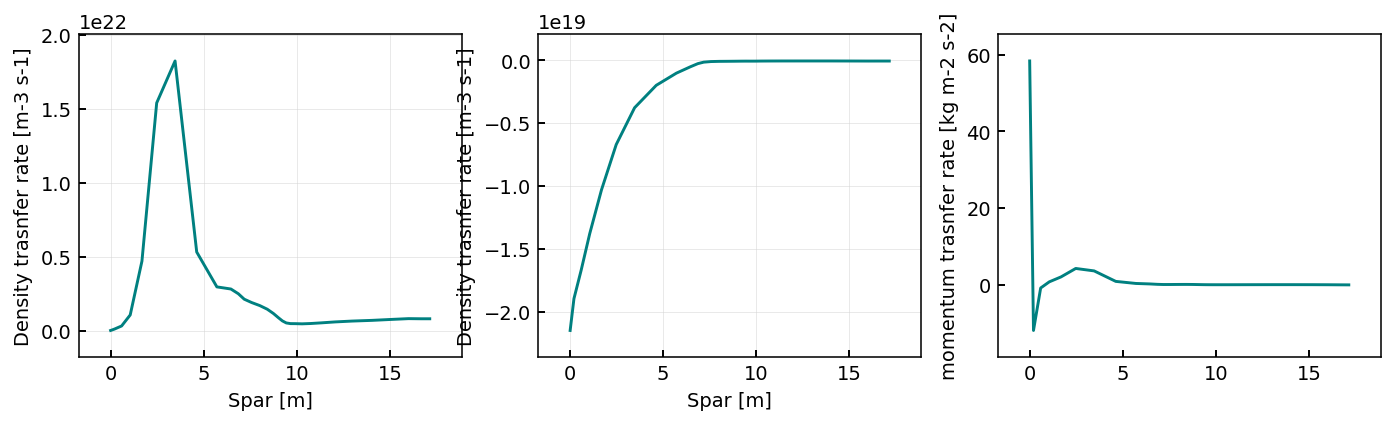

In [ ]:
ds = cs["MAST-U"].ds.isel(t=-1)
df_fieldline = get_1d_poloidal_data(ds, params = ["Sd+_iz", "Sd+_rec", "Fdd+_cx"], region = "outer_lower", sepadd=15)
display(df_fieldline.tail(5))

fig, ax = plt.subplots(1, 3,figsize = (12,3))
ax[0].plot(df_fieldline["Spar"].values[::-1], df_fieldline["Sd+_iz"])
ax[1].plot(df_fieldline["Spar"].values[::-1], df_fieldline["Sd+_rec"])
ax[2].plot(df_fieldline["Spar"].values[::-1], df_fieldline["Fdd+_cx"])

for i in range(0, 2):
    ax[i].set_xlabel("Spar [m]")
    ax[i].grid(True, alpha=0.5)

ax[0].set_ylabel("Density trasnfer rate [m-3 s-1]")
ax[1].set_ylabel("Density trasnfer rate [m-3 s-1]")
ax[2].set_ylabel("momentum trasnfer rate [kg m-2 s-2]")



dr        Sd+_iz       Sd+_rec    Fdd+_cx      Srad  sep
31  0.016545  1.287922e+20 -4.120118e+19  85.685043  0.108319    0
32  0.018412  7.255728e+19 -3.088368e+19  72.845659  0.125798    0
33  0.020393  3.127132e+19 -2.148721e+19  58.334279  0.145200    0
34  0.022483  8.617602e+18 -1.334916e+19  42.542133  0.166638    0
35  0.024686  9.839967e+17 -6.384860e+18  25.592618  0.190222    0

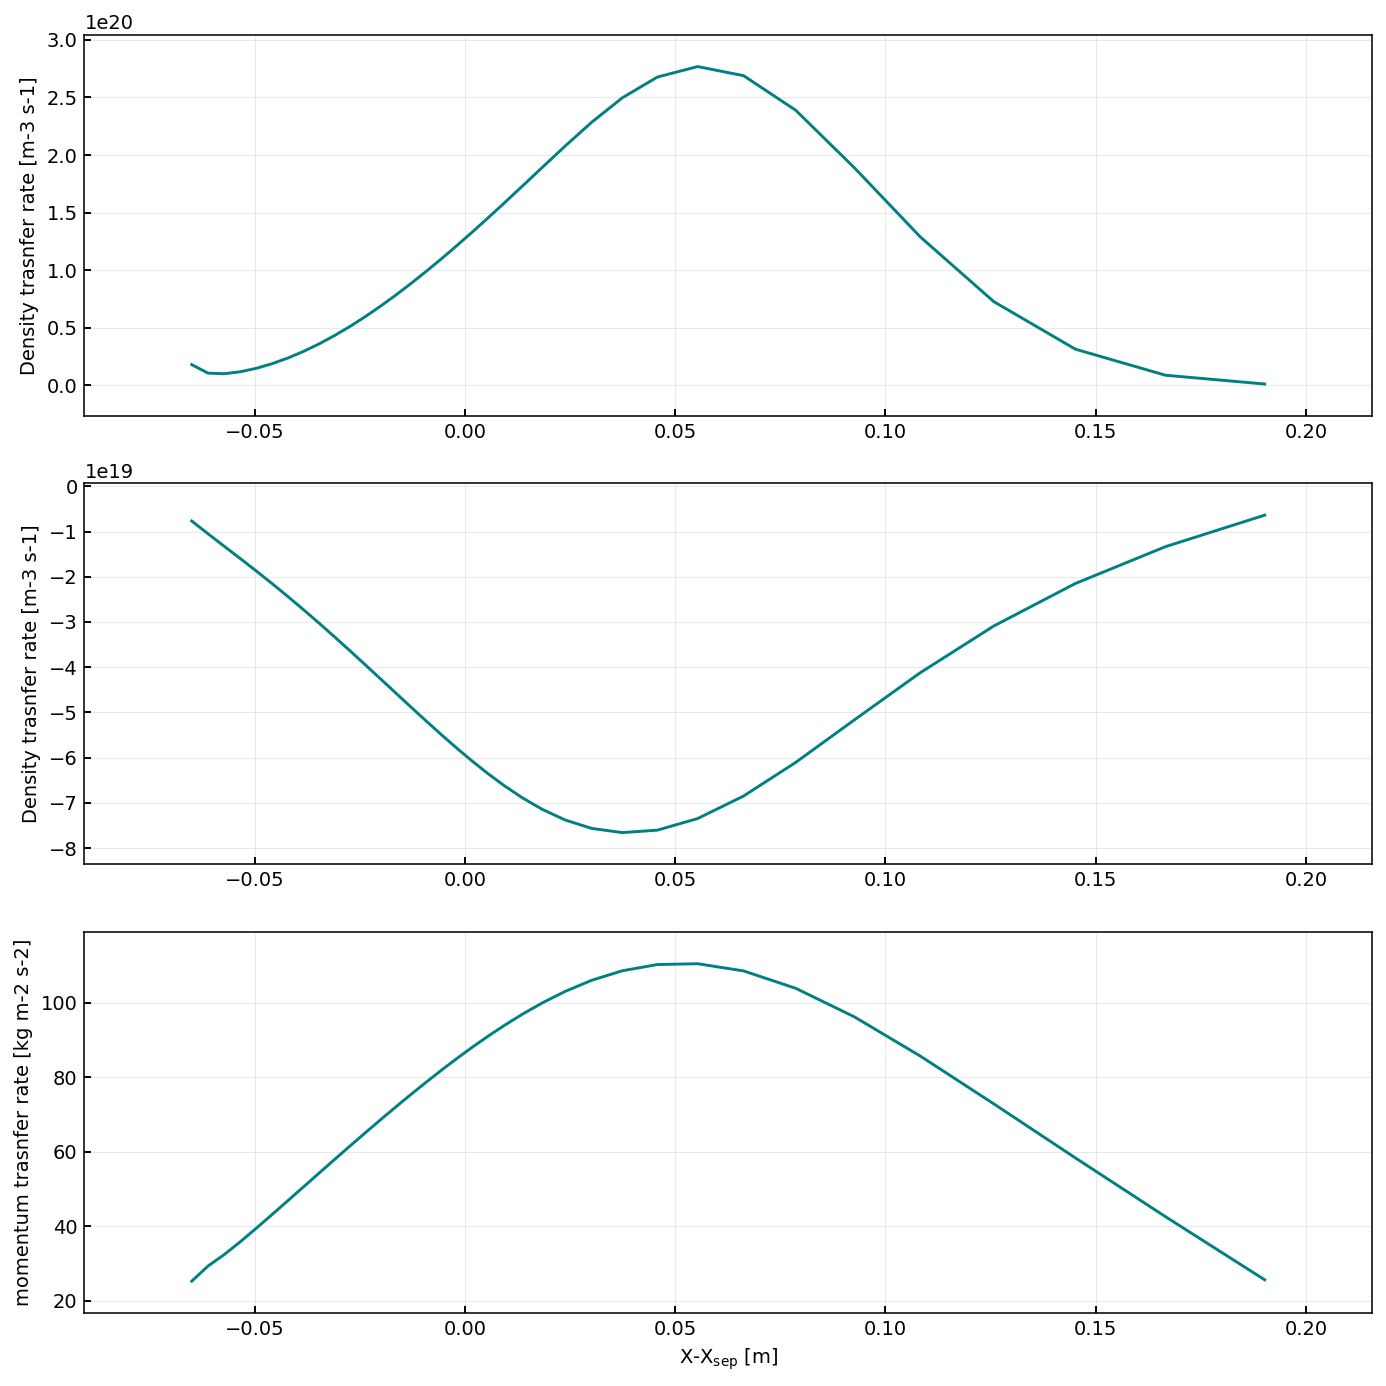

In [ ]:
ds = cs["MAST-U"].ds.isel(t=-1)
df_radial = get_1d_radial_data(ds, params = ["Sd+_iz", "Sd+_rec", "Fdd+_cx"], region = "outer_lower_target")
display(df_radial.tail(5))

fig, ax = plt.subplots(3, 1,figsize = (10, 10))
ax[0].plot(df_radial["Srad"], df_radial["Sd+_iz"])
ax[1].plot(df_radial["Srad"], df_radial["Sd+_rec"])
ax[2].plot(df_radial["Srad"], df_radial["Fdd+_cx"])

for i in range(0, 3):
    ax[i].grid(True, alpha=0.5)
    # ax[i].set_yscale("symlog")

ax[0].set_ylabel("Density trasnfer rate [m-3 s-1]")
ax[1].set_ylabel("Density trasnfer rate [m-3 s-1]")
ax[2].set_ylabel("momentum trasnfer rate [kg m-2 s-2]")
ax[2].set_xlabel("X-$X_{sep}$ [m]")

plt.tight_layout()

t  total_poloidal_distance      zeta        dr         Te  \
31  0.105351                      NaN  3.141593  0.001632  17.556568   
32  0.105351                      NaN  3.141593  0.001835  15.419099   
33  0.105351                      NaN  3.141593  0.002054  13.642809   
34  0.105351                      NaN  3.141593  0.002288  12.284857   
35  0.105351                      NaN  3.141593  0.002537  11.472167   

          Td+         Td      Srad  sep  
31  64.883146  20.327182  0.010208    0  
32  61.022164  19.601547  0.011941    0  
33  57.489909  18.821802  0.013885    0  
34  54.586380  18.000031  0.016056    0  
35  52.793269  17.221990  0.018469    0

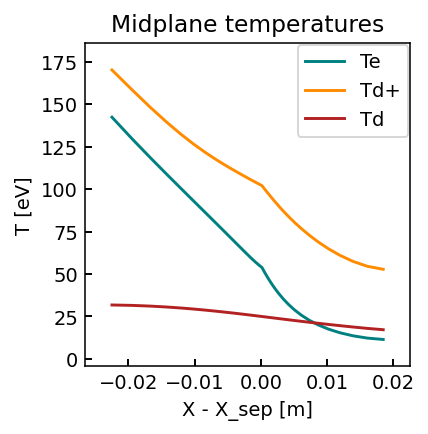

In [ ]:
df_midplane = get_1d_radial_data(ds, params = ["Te", "Td+", "Td"], region = "omp")
display(df_midplane.tail(5))

fig, ax = plt.subplots(figsize = (3,3))
ax.plot(df_midplane["Srad"], df_midplane["Te"], label = "Te")
ax.plot(df_midplane["Srad"], df_midplane["Td+"], label = "Td+")
ax.plot(df_midplane["Srad"], df_midplane["Td"], label = "Td")
ax.set_xlabel("X - X_sep [m]")
ax.set_ylabel("T [eV]")
ax.set_title("Midplane temperatures")
ax.legend()


# Find X point
The lowest poloidal field point (null point) is where X point is

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3700402/2500948229.py:10: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel("$S_{\parallel}$")


[0.18939982 0.18939983 0.1988261  0.15900887 0.11534512 0.09086841
 0.0733252  0.0607765  0.05006518 0.03625931 0.02001062 0.02079369
 0.03961822 0.06048693 0.08715595 0.1221299  0.16483862 0.20525743
 0.2195226  0.19091674 0.14381714 0.0976884  0.0692252  0.04912599
 0.03599446 0.02778734 0.02279901 0.01975587 0.01785406 0.01665026
 0.01590073]


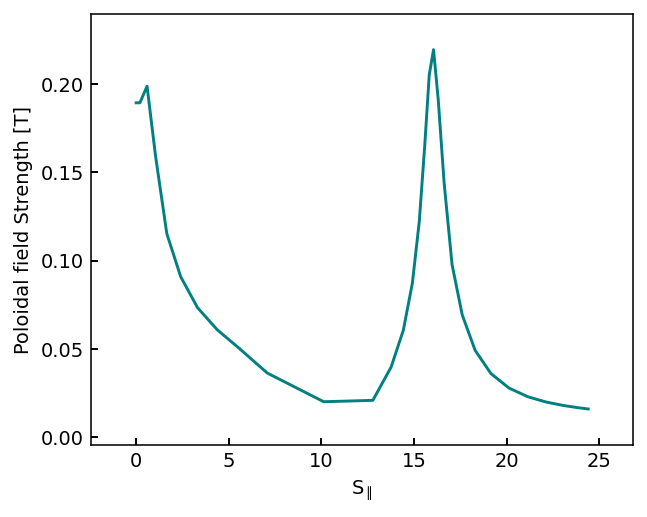

In [6]:
ds = cs["MAST-U"].ds
ds = cs["MAST-U"].ds.isel(t=-1)
df_fieldline = get_1d_poloidal_data(ds, params = ["Bpxy","Brxy","Bzxy"], region = "outer_lower", sepadd=1)

Btxy = np.sqrt(df_fieldline["Brxy"] **2 +df_fieldline["Bzxy"] **2)

# Btxy.plot()
fig, ax = plt.subplots()
ax.plot(df_fieldline["Spar"], df_fieldline["Bpxy"])
ax.set_xlabel("$S_{\parallel}$")
ax.set_ylabel("Poloidal field Strength [T]")

print(df_fieldline["Bpxy"].values)

Parameter  not found
Parameter  not found


ValueError: x and y must have same first dimension, but have shapes (36,) and (31,)

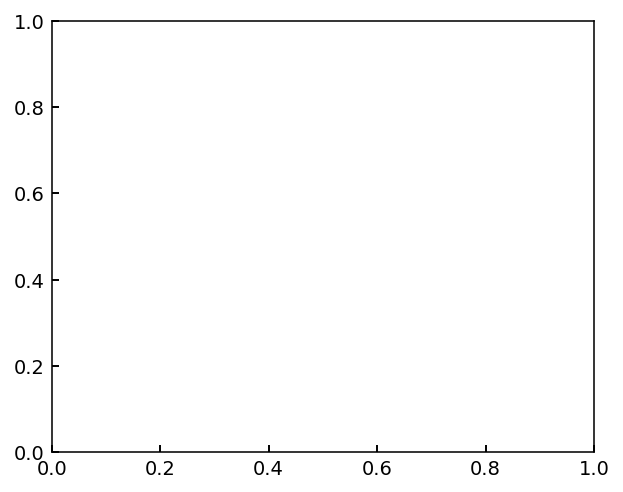

In [31]:
df_midplane = get_1d_radial_data(ds, params = [""], region = "omp")

df_fieldline = get_1d_poloidal_data(ds, params = [""], region = "outer_lower", sepadd=1)

fig, ax = plt.subplots()
ax.plot(df_midplane["Srad"], df_fieldline["Spar"])